In [164]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


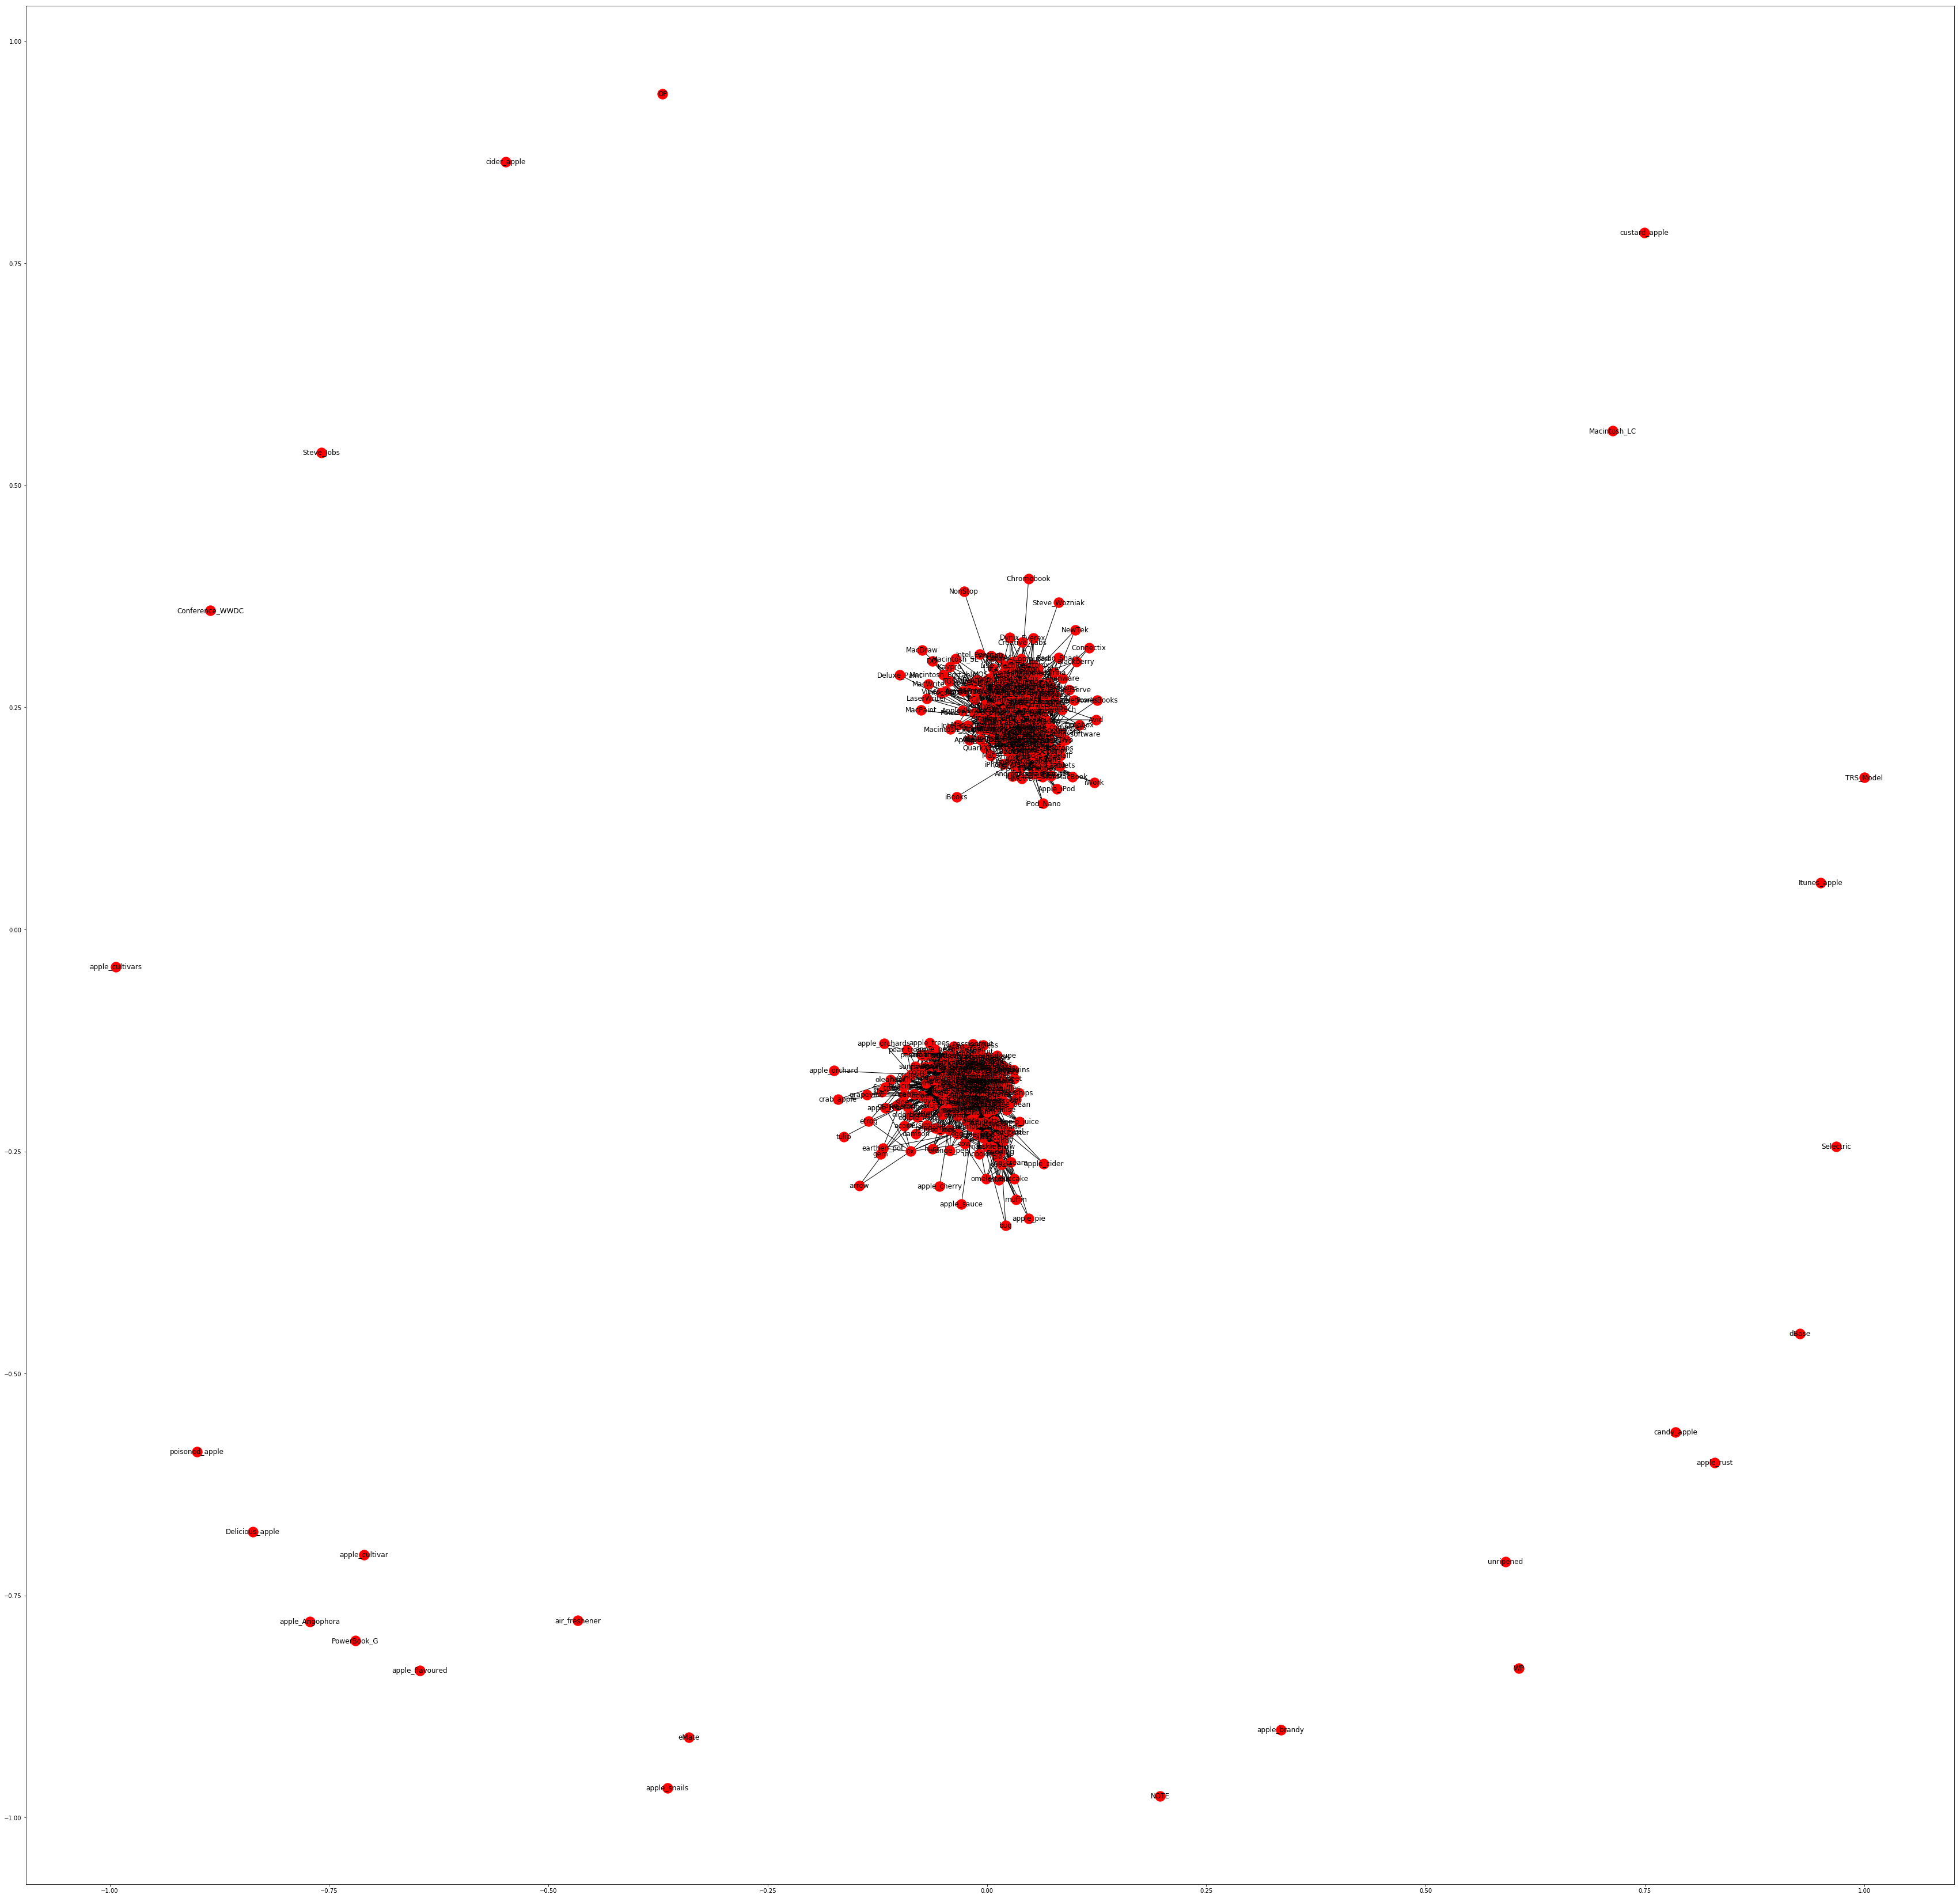

In [78]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network)

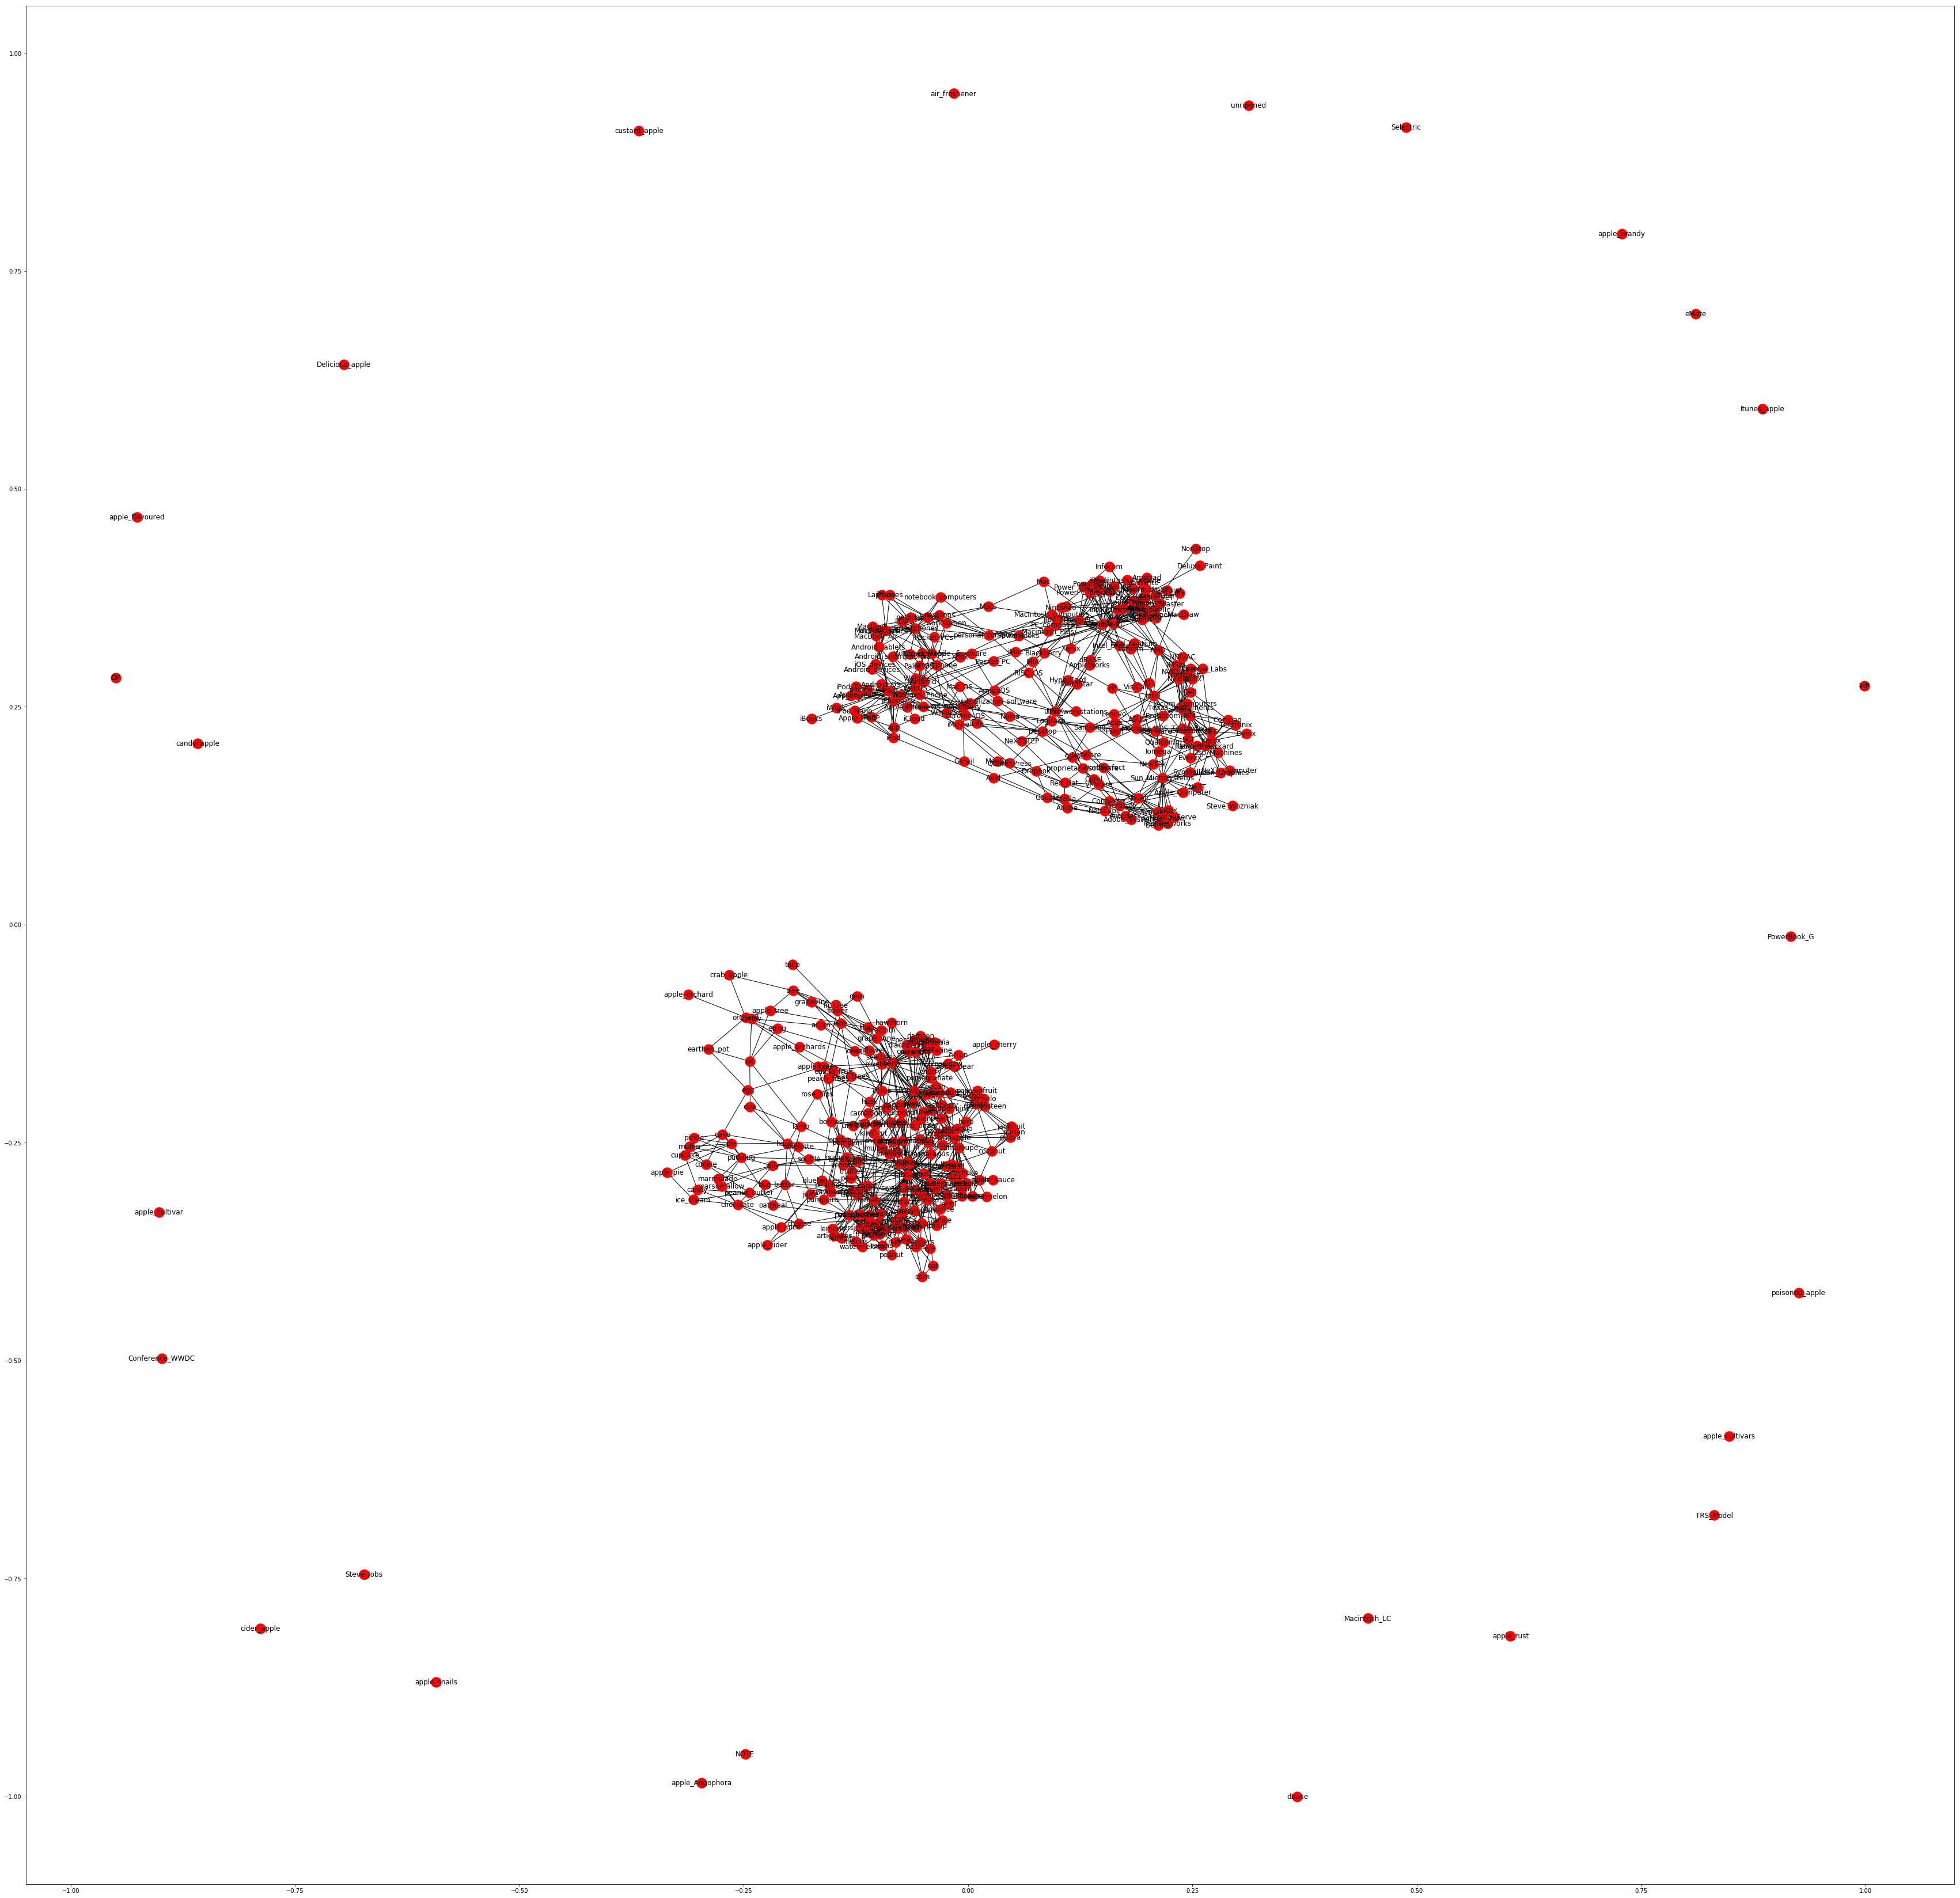

In [80]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network)

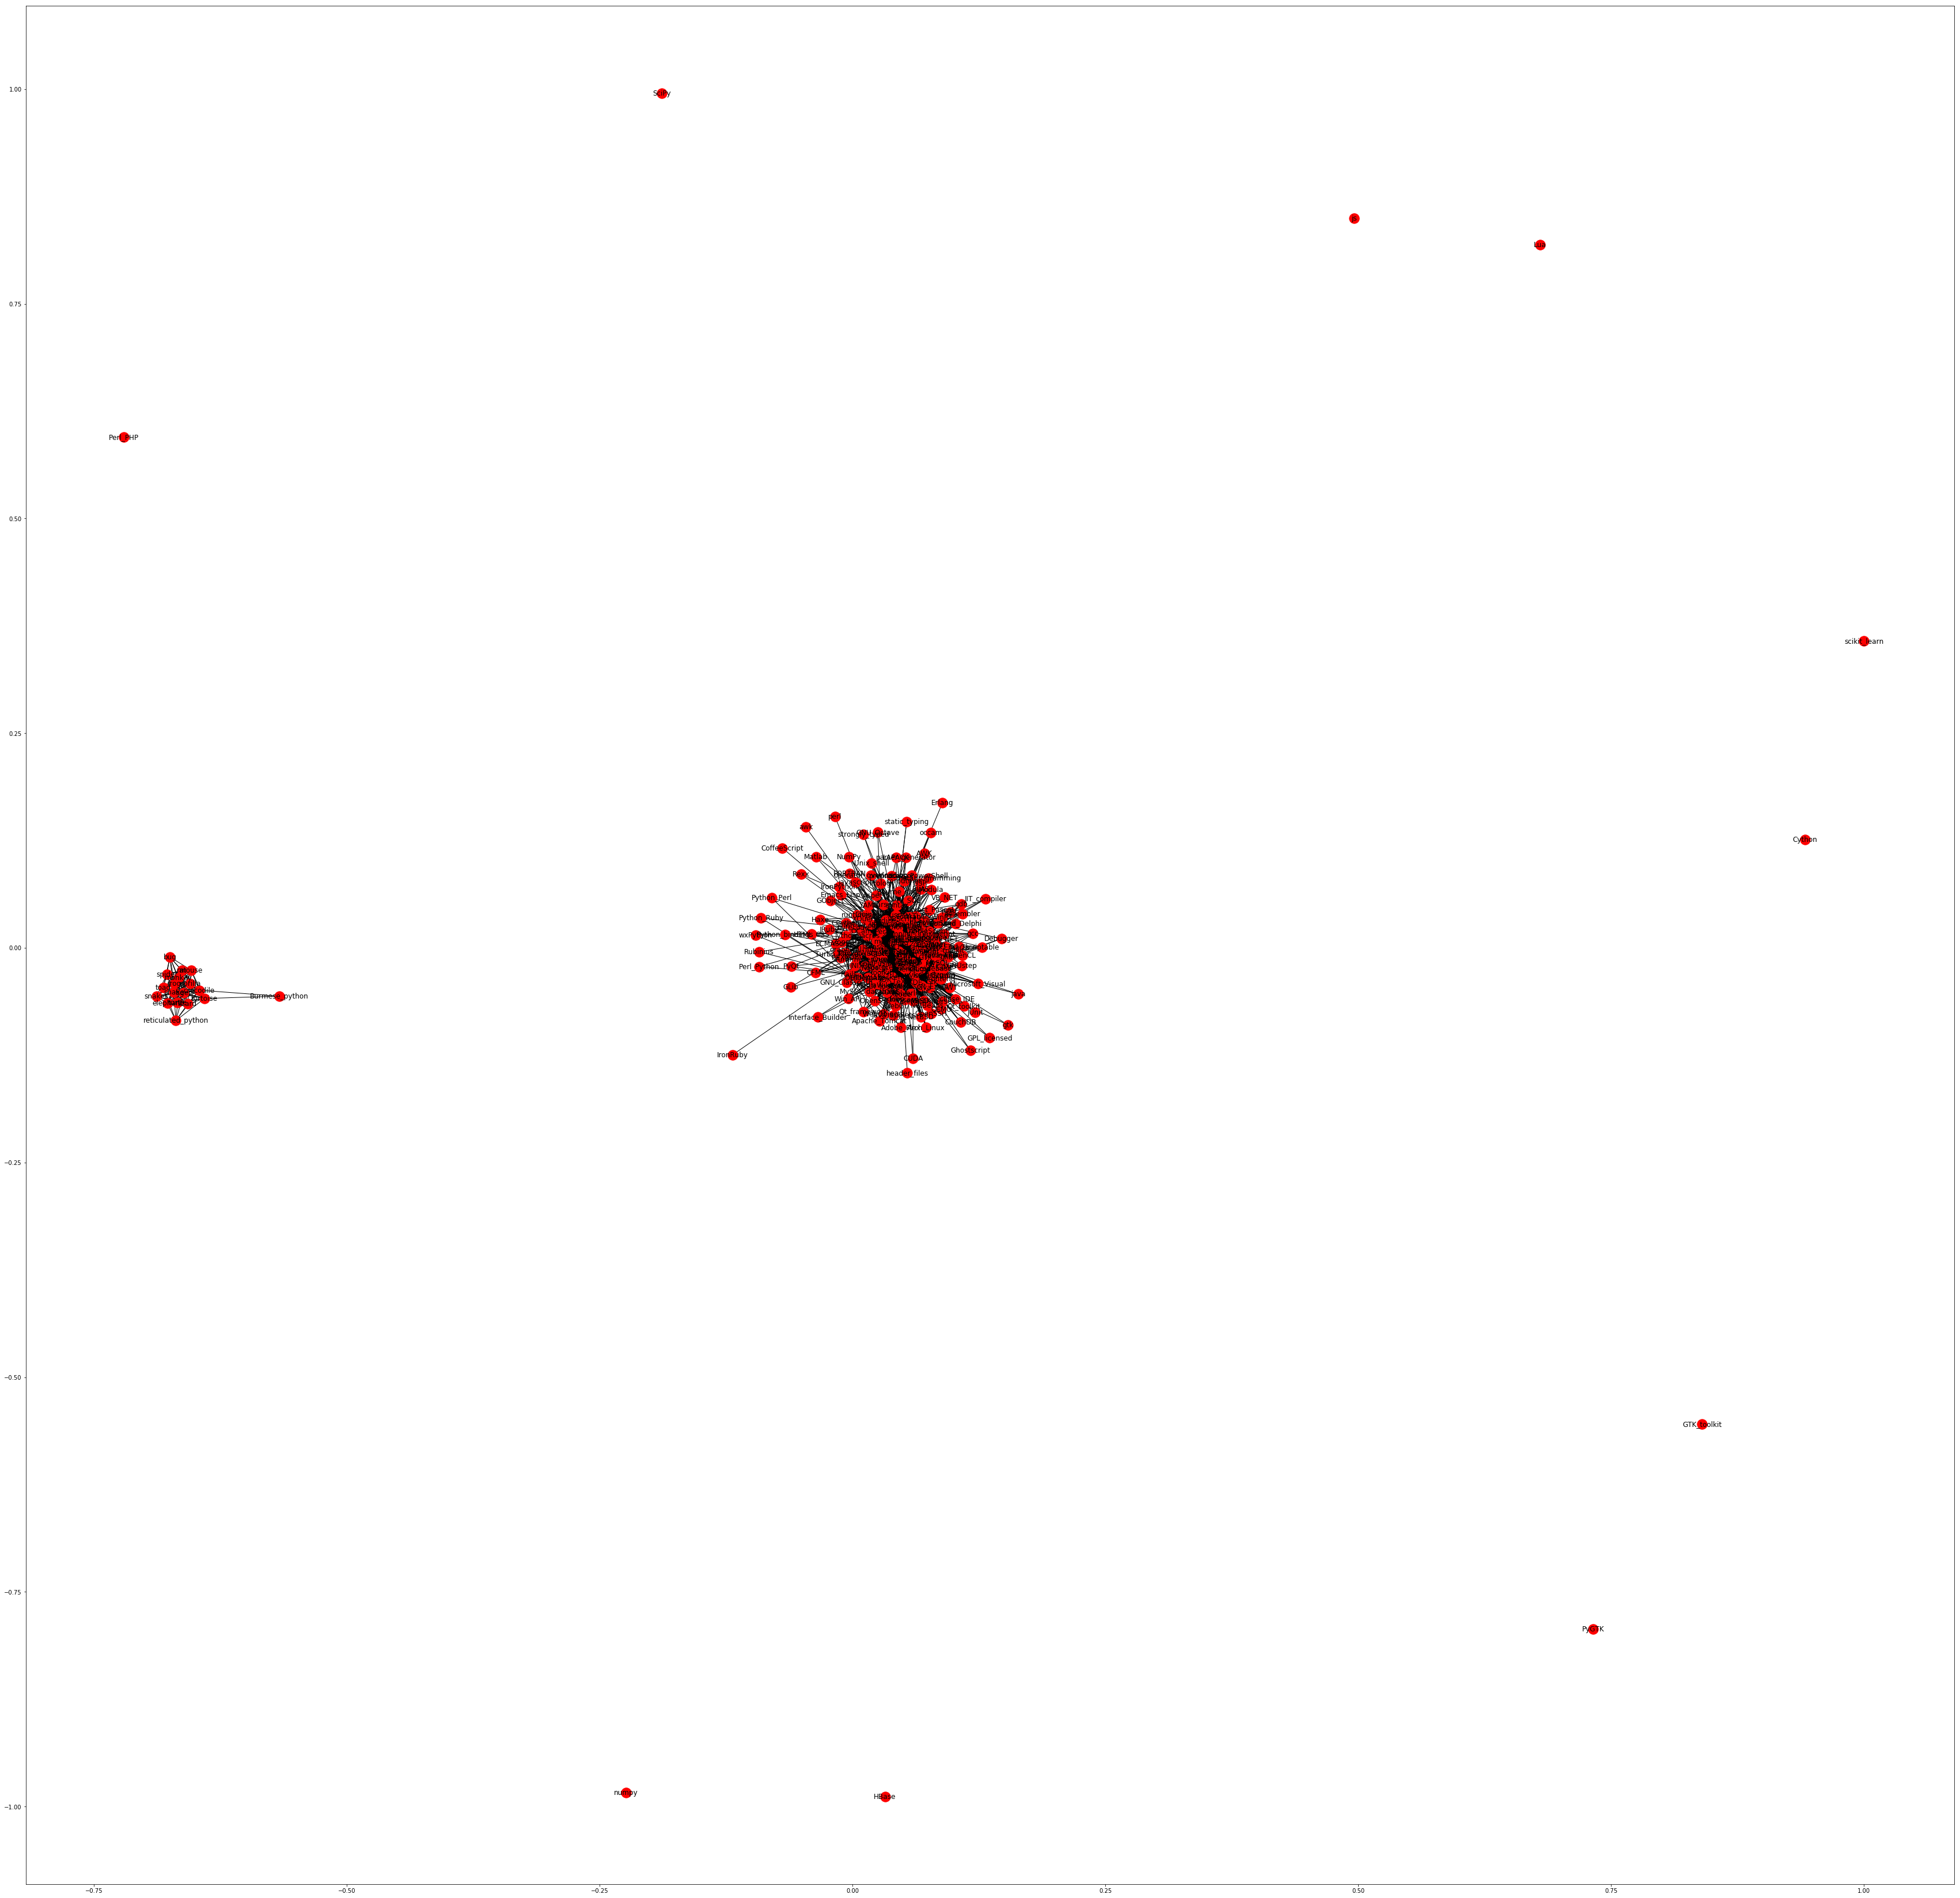

In [83]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network)

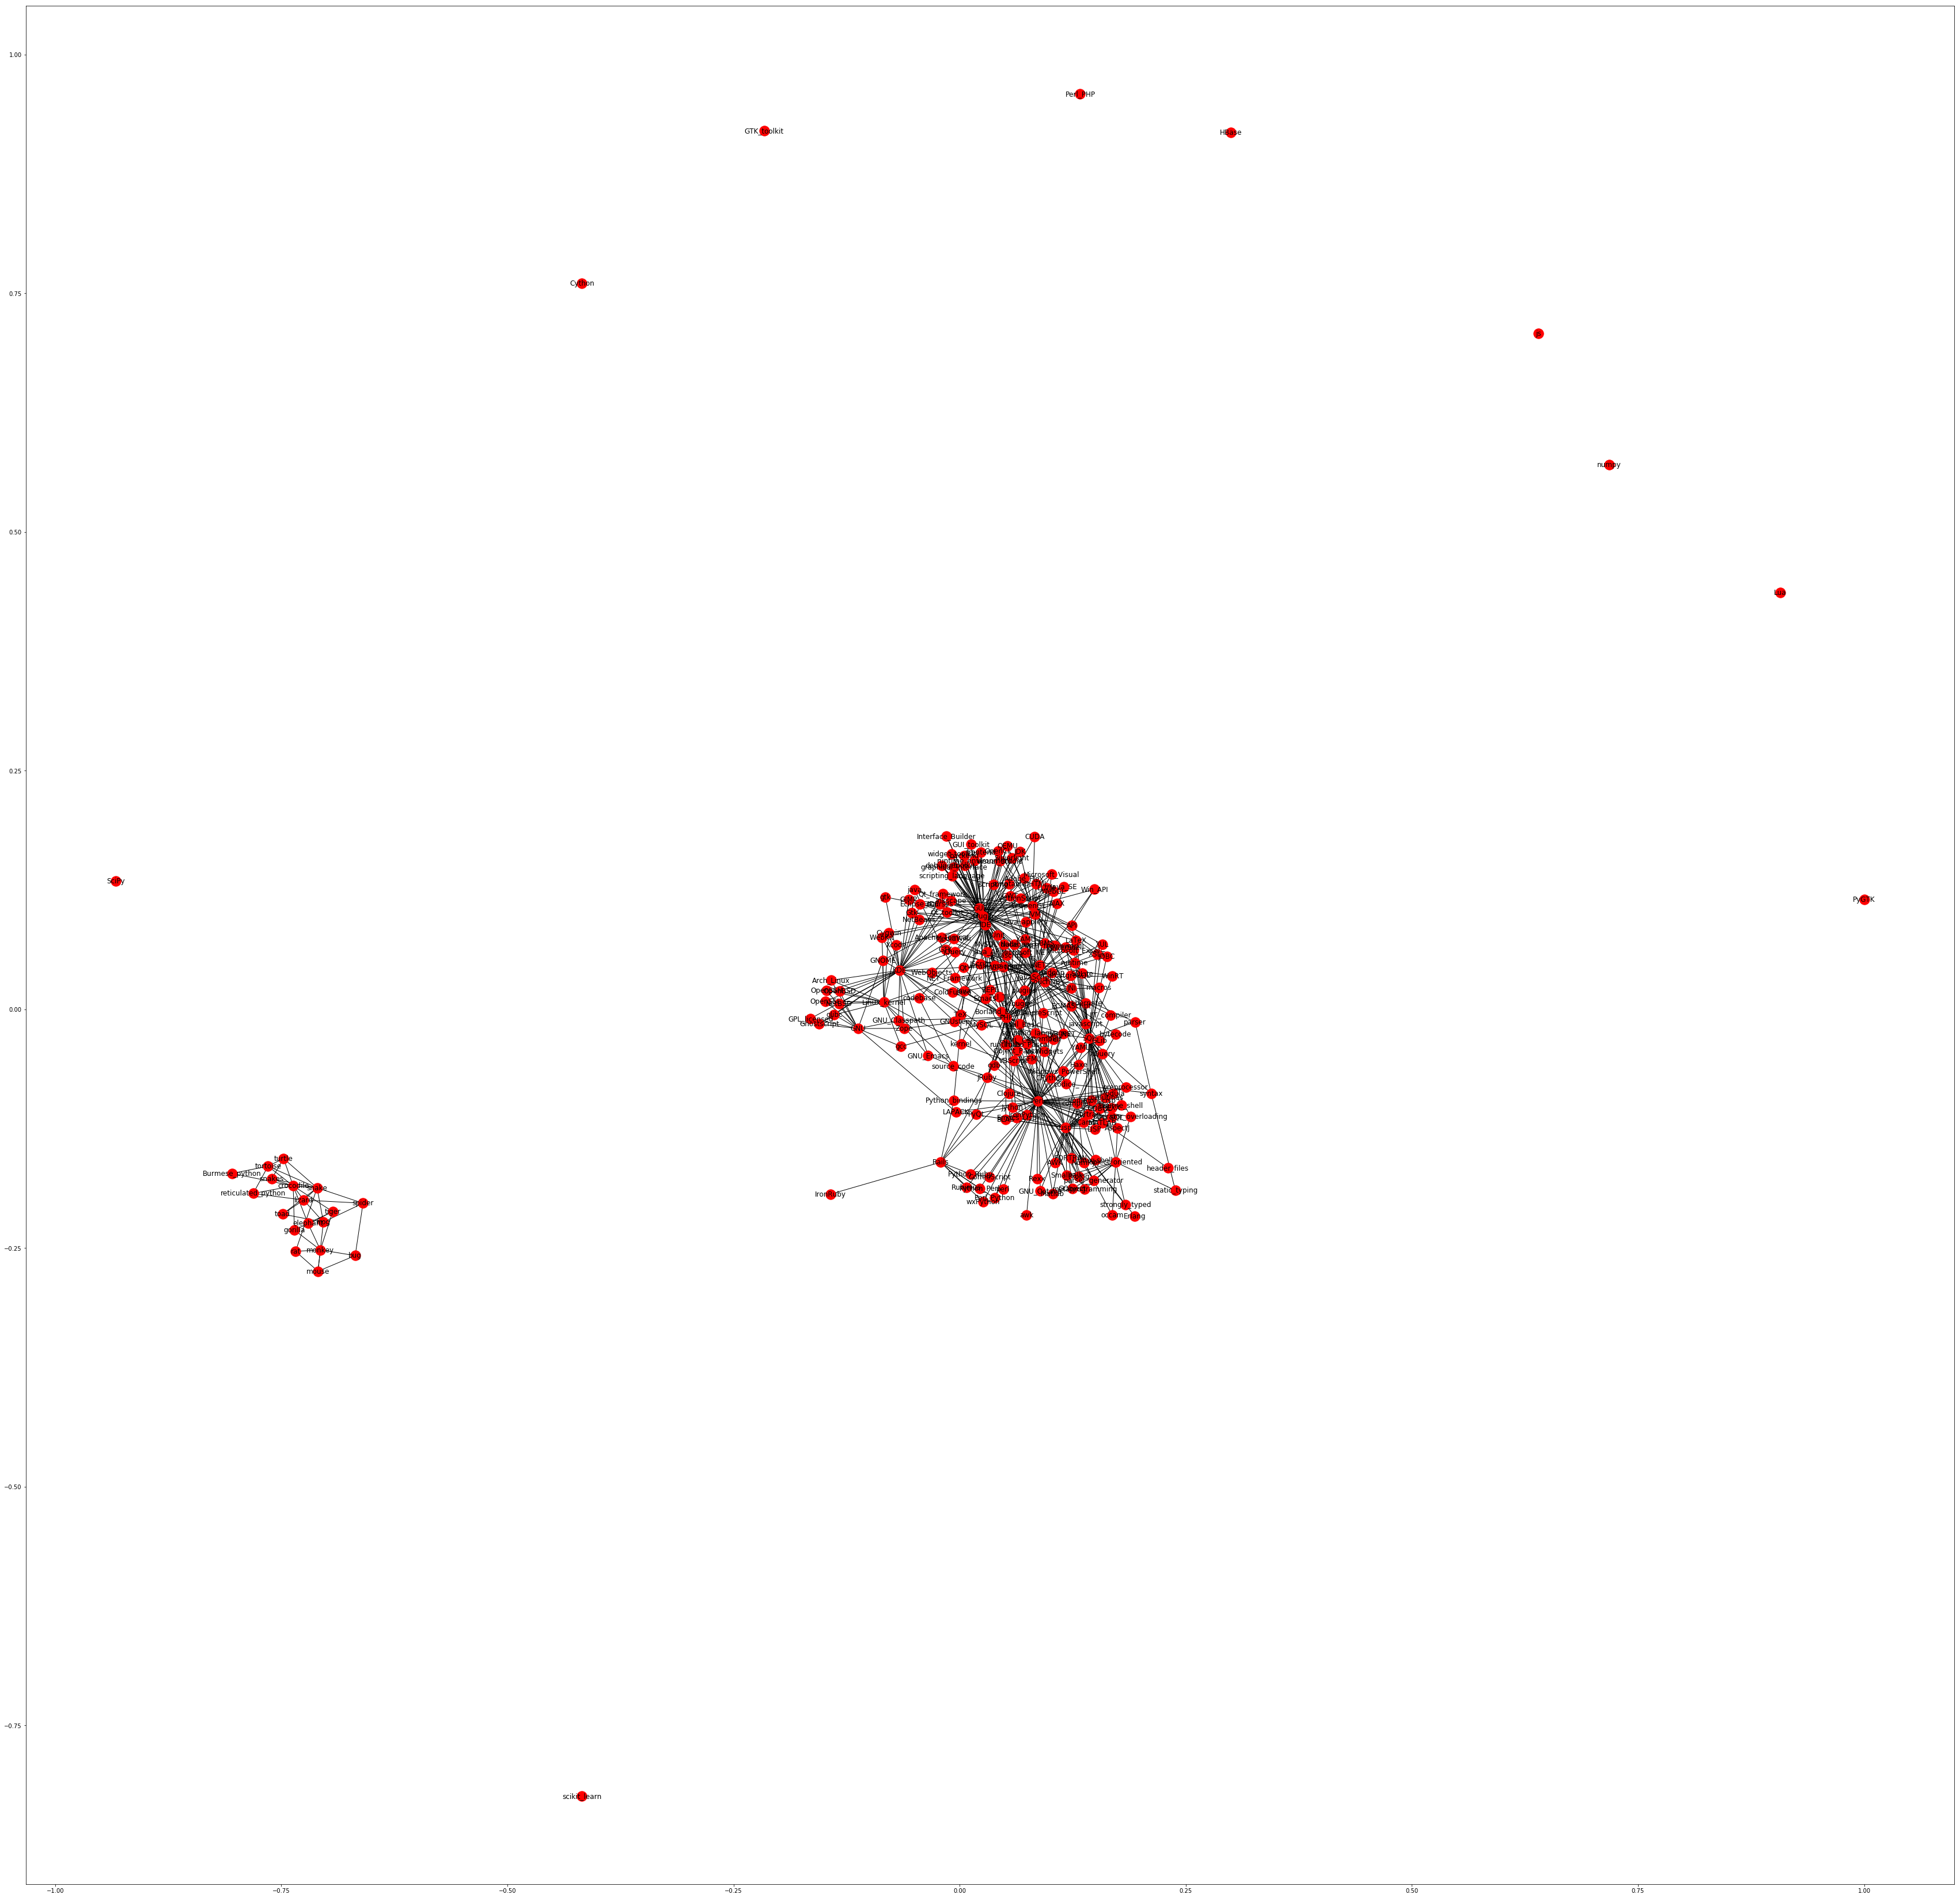

In [85]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network)

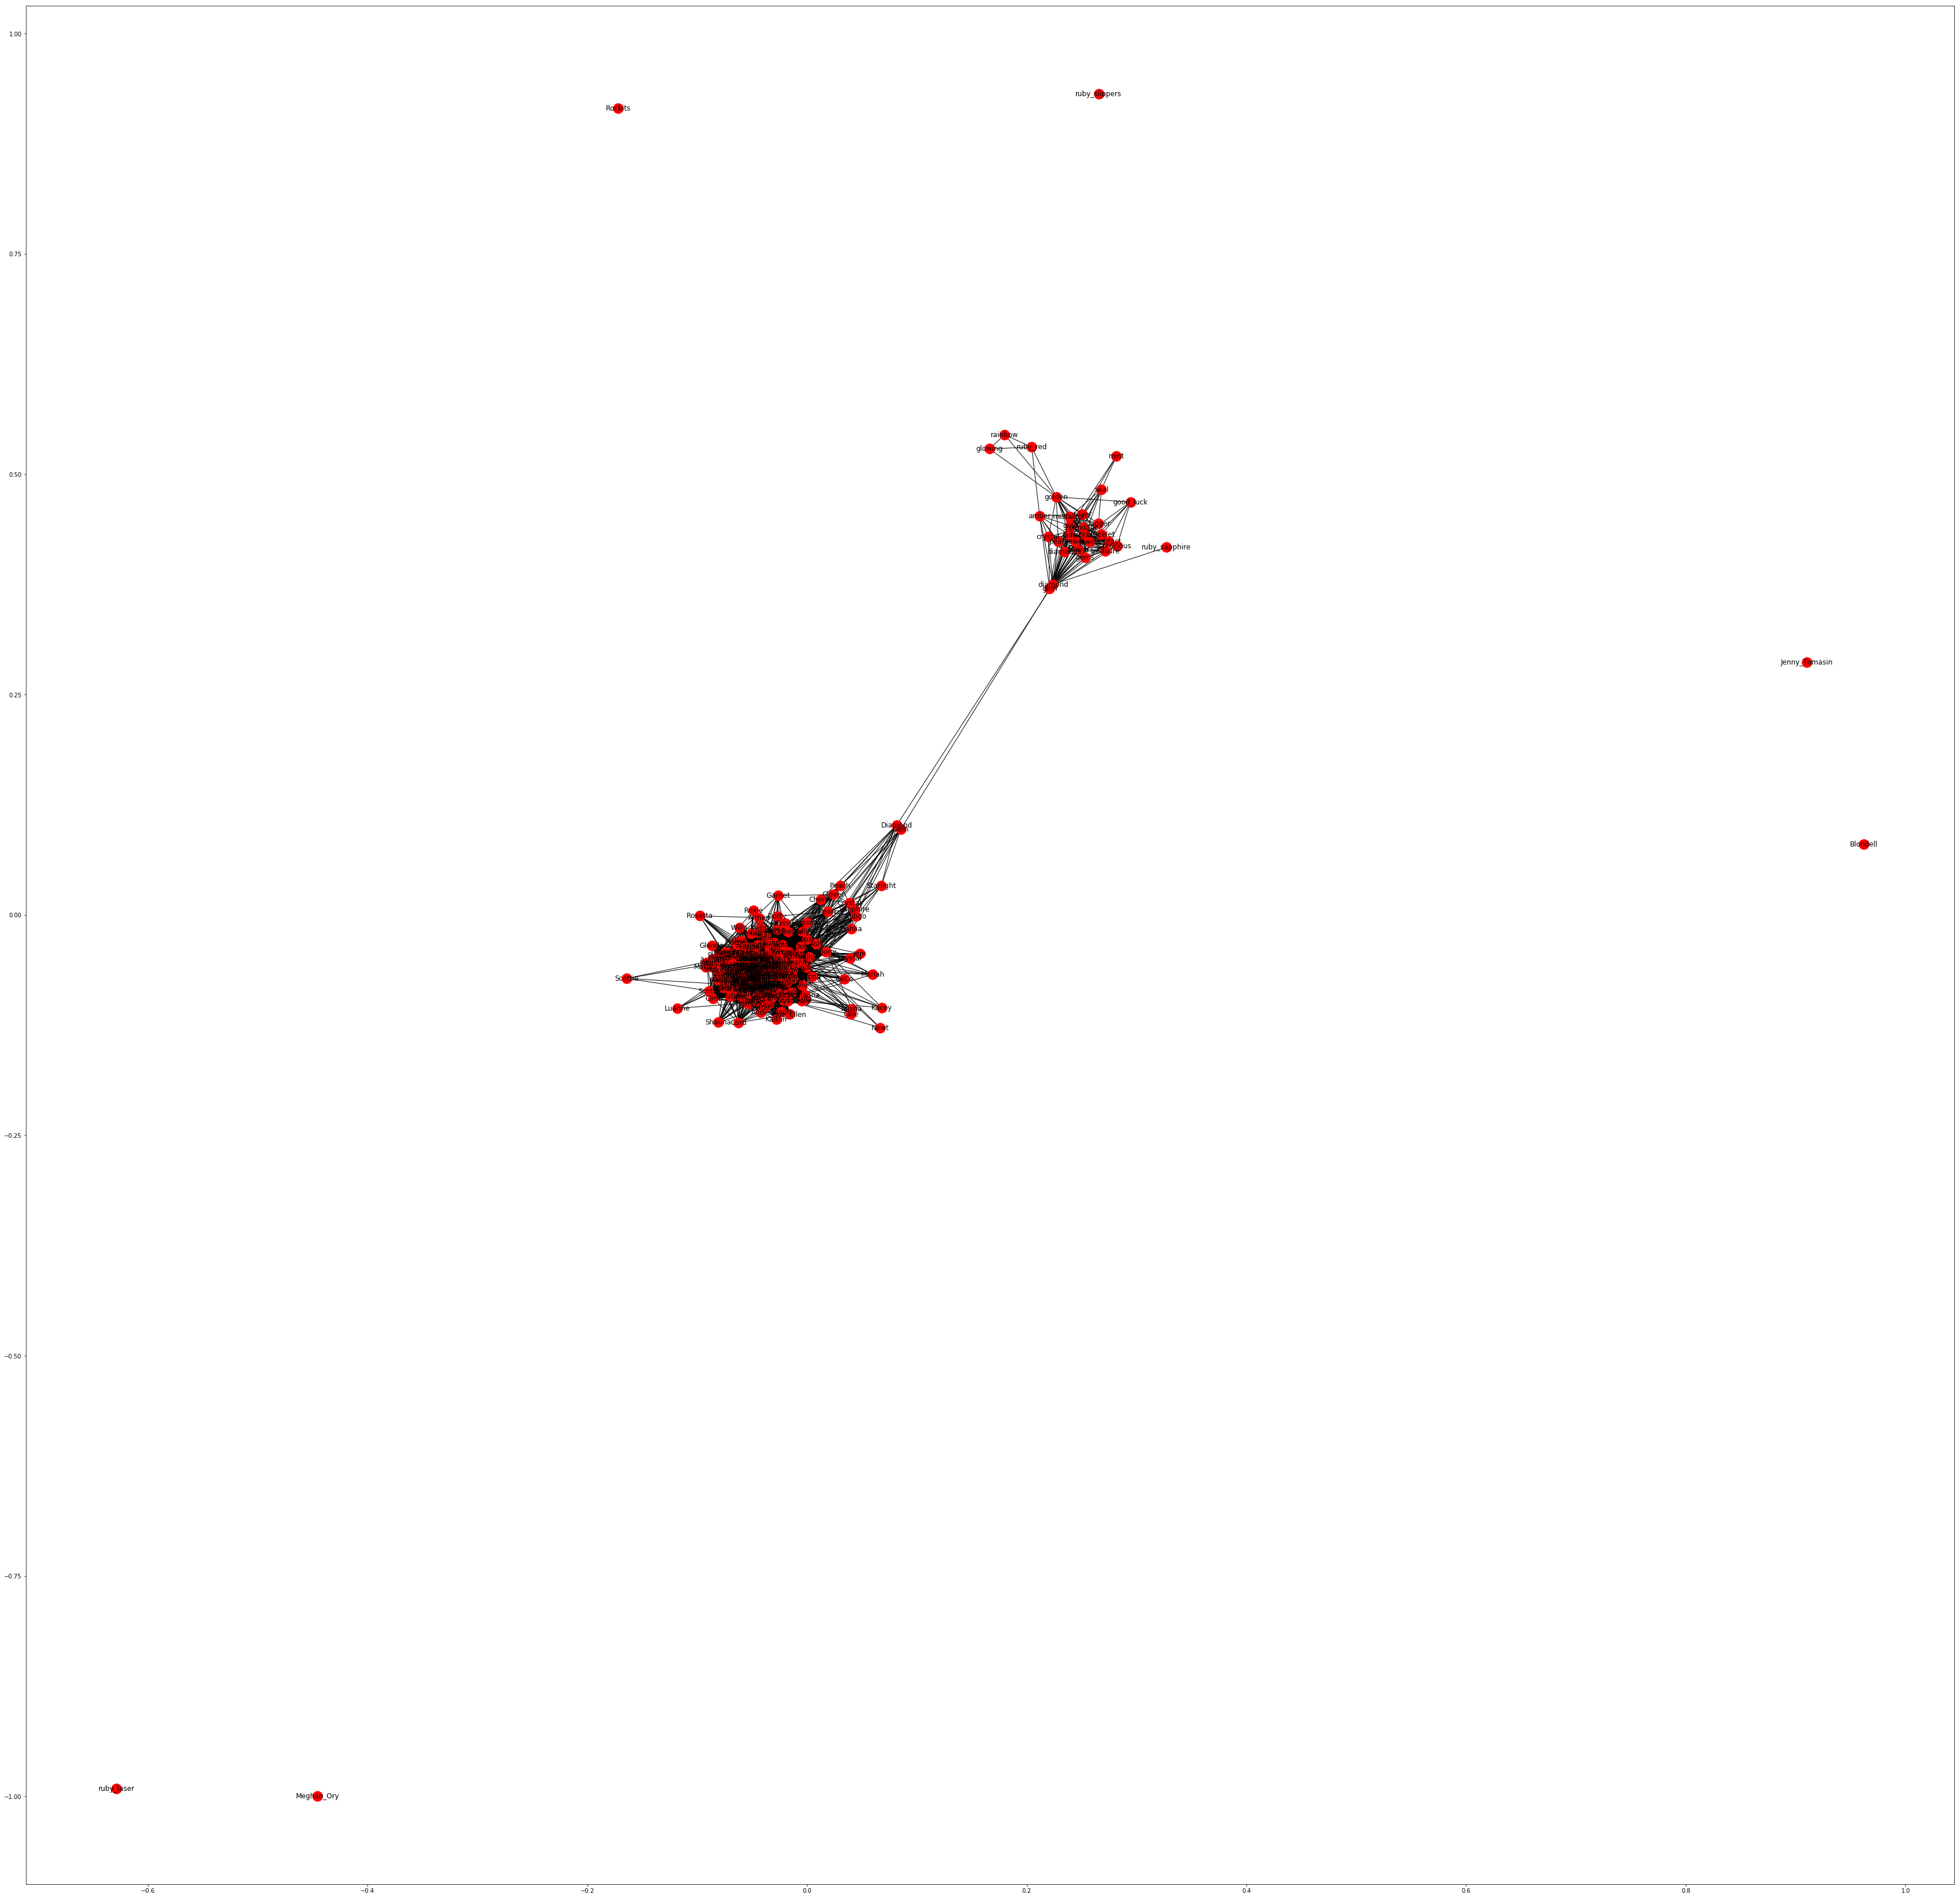

In [87]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network)

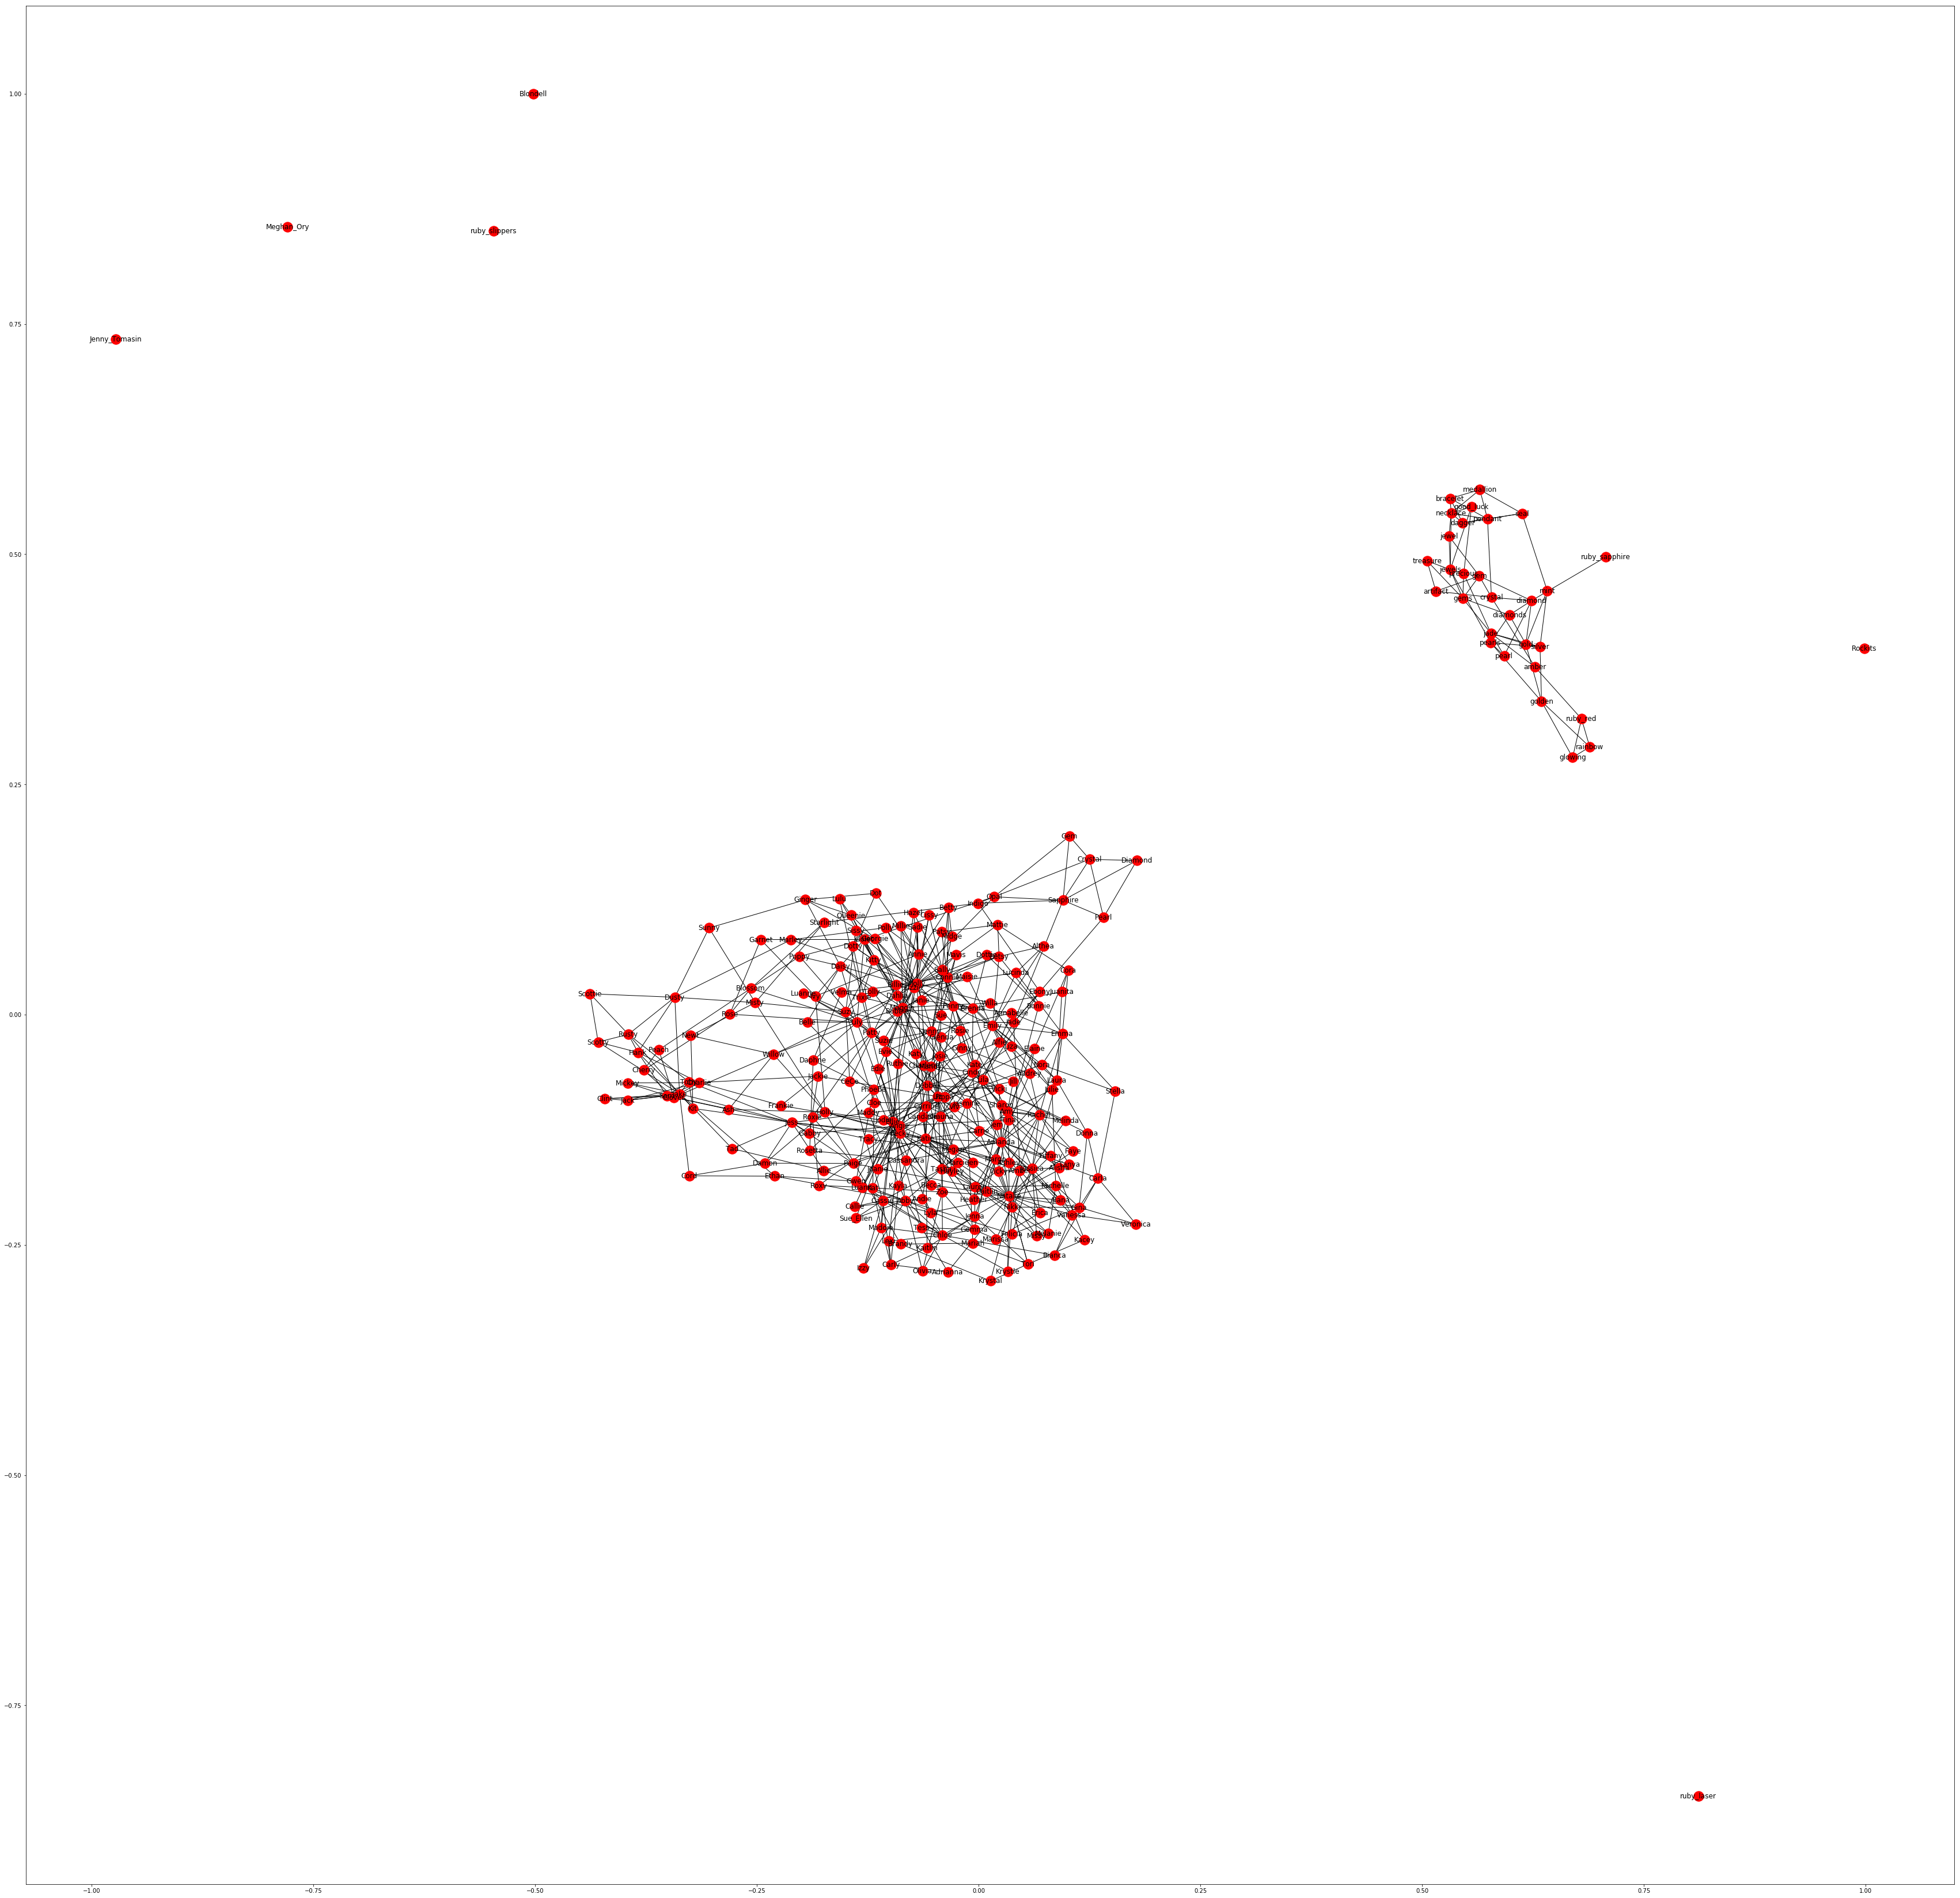

In [89]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network)

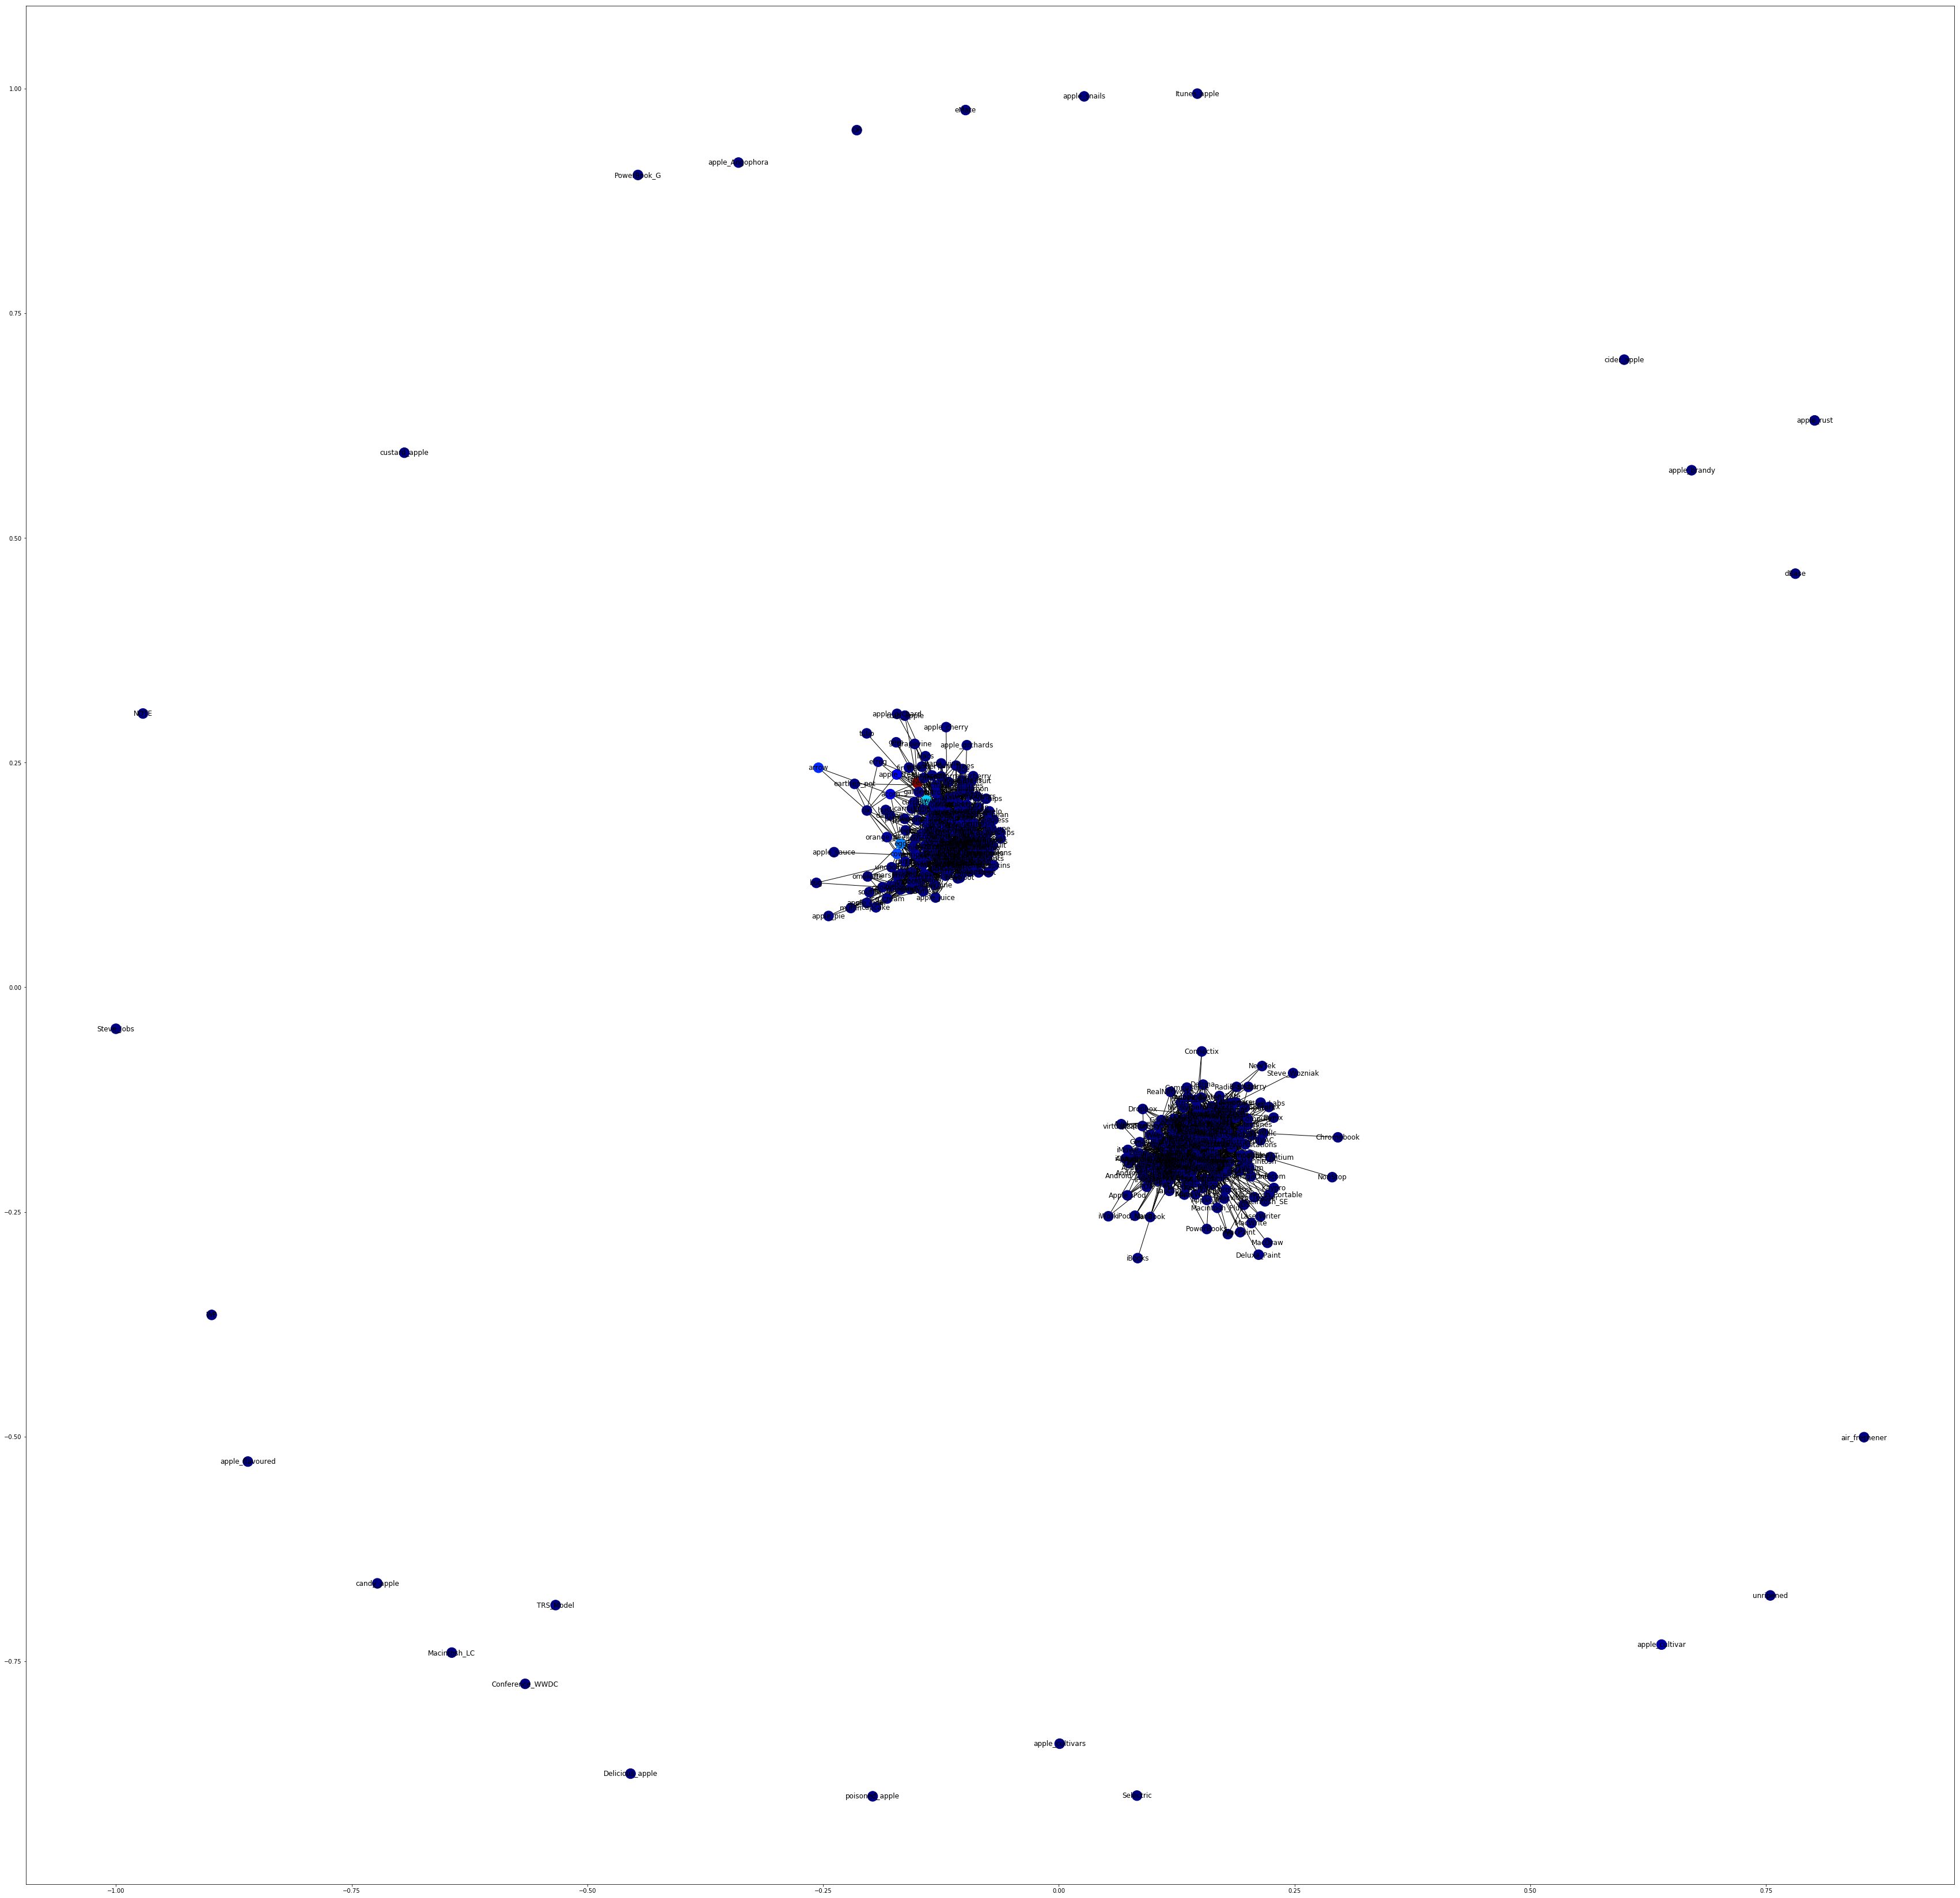

In [180]:
import matplotlib.pyplot as plt
import networkx as nx 
from math import exp

def get_color(node): 
    return 1. / node["label"]

values = [get_color(ego_network.node[node]) for node in ego_network.nodes()]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 60)
nx.draw_networkx(ego_network, cmap=plt.get_cmap('jet'), node_color=values)
plt.show()

In [239]:
len(G.nodes)
#G = nx.read_edgelist(graph_fpath, nodetype=str, delimiter="\t", data=(('weight',float),))

620235

In [236]:
from multiprocessing import Pool 

num_cores = 8

def foo(ego):
    en = {ego: 200}
    return en

with Pool(num_cores) as pool:
    for res in pool.imap_unordered(foo, range(10)): 
        print(res) 


{1: 200}
{4: 200}
{2: 200}
{3: 200}
{0: 200}
{5: 200}
{9: 200}
{8: 200}
{7: 200}
{6: 200}


In [ ]:
from cw import chinese_whispers, aggregate_clusters
import codecs 
from time import time 
import networkx as nx
from multiprocessing import Pool 


verbose = True

def get_clustered_ego_network(ego):
    tic = time()
    ego_network = nx.Graph(name=ego)

    # Add related and substring substring nodes 
    substring_nodes = []
    for j, node in enumerate(G.nodes):
        if ego.lower() == node.lower():
            ego_network.add_nodes_from( [rn for rn in G[node].keys()] )
        else:
            if "_" not in node: continue
            if node.startswith(ego + "_") or node.endswith("_" + ego):
                substring_nodes.append(node)
    ego_network.add_nodes_from(substring_nodes)

    # Find edges of the ego network
    for r_node in ego_network:
        related_related_nodes = G[r_node]
        related_related_nodes_ego = sorted(
            [(related_related_nodes[rr_node]["weight"], rr_node) for rr_node in related_related_nodes if rr_node in ego_network],
            reverse=True)[:n]
        related_edges = [(r_node, rr_node, {"weight": w}) for w, rr_node in  related_related_nodes_ego]

        ego_network.add_edges_from(related_edges)

    # Perform clustering   
    chinese_whispers(ego_network, weighting="top", iterations=20)
    if verbose: print("{}\t{:f} sec.".format(ego, time()-tic))
        
    return ego_network


def word_sense_induction(neighbors_fpath, clusters_fpath, n=300, num_cores=32): 
    G = nx.read_edgelist(neighbors_fpath, nodetype=str, delimiter="\t", data=(('weight',float),))

    with codecs.open(clusters_fpath, "w", "utf-8") as output, Pool(num_cores) as pool:    
        output.write("word\tcid\tcluster\tisas\n") 

        for ego_network in pool.imap_unordered(get_clustered_ego_network, G.nodes): 
            
            sense_num = 1
            for label, cluster in sorted(aggregate_clusters(ego_network).items(), key=lambda e: len(e[1]), reverse=True):
                output.write("{}\t{}\t{}\t\n".format(
                    ego_network.name,
                    sense_num,
                    ",".join(cluster)
                ))
                sense_num += 1

        print("Clusters:", clusters_fpath)
    
    
neighbors_fpath = "model/wikipedia-phrases-list-dim300.neighbors" # wikipedia-phrases-list-dim300.neighbors.all2
word_sense_induction(neighbors_fpath, clusters_fpath, n=300, num_cores=12)


its	1.729555 sec.
s	1.708523 sec.
itself	1.951756 sec.
a	2.165699 sec.
this	2.272414 sec.
thus	2.409909 sec.
whole	2.807476 sec.
and	3.010411 sec.
any	1.834436 sec.
another	1.686237 sec.
their	1.431958 sec.
The	4.053766 sec.
the	4.060583 sec.
it	2.336224 sec.
to	2.458715 sec.
of	4.761471 sec.
entire	0.934415 sec.
in	4.847488 sec.
one	2.488467 sec.
that	3.975476 sec.
each	1.607056 sec.
therefore	2.384867 sec.
proper	2.580387 sec.
new	1.505566 sec.
directly	1.168654 sec.
normal	1.831129 sec.
them	2.235111 sec.
rather_than	1.705098 sec.
or	1.918389 sec.
only	2.221832 sec.
full	1.257276 sec.
either	1.589020 sec.
continuous	1.495948 sec.
which	1.594278 sec.
those	1.606636 sec.
all	1.662541 sec.
for	1.846046 sec.
This	1.777486 sec.
weak	1.814422 sec.
actual	2.082741 sec.
even	2.143902 sec.
power	0.995894 sec.
mass	1.427277 sec.
internal	1.638619 sec.
effectively	1.086231 sec.
some	3.200254 sec.
horizontal	1.498059 sec.
fixed	1.710785 sec.
fully	1.528187 sec.
almost	1.674381 sec.
instead	1.92

jaws	1.151031 sec.
allowing	1.102859 sec.
cold	1.151350 sec.
organic	0.948377 sec.
Finally	2.076781 sec.
quickly	0.969389 sec.
than	1.069649 sec.
For_example	1.223719 sec.
sharp	1.493790 sec.
blade	1.666753 sec.
outside	1.358593 sec.
during	1.716321 sec.
across	0.993191 sec.
elsewhere	0.833286 sec.
at	2.101089 sec.
around	1.563137 sec.
first	1.016688 sec.
since	1.690773 sec.
until	1.659614 sec.
throughout	1.949412 sec.
inside	1.495448 sec.
rapidly	0.916444 sec.
after	1.248399 sec.
eventually	1.285020 sec.
before	1.939581 sec.
permanently	0.747051 sec.
second	0.986351 sec.
periphery	0.901453 sec.
major	0.896660 sec.
stationary	1.504264 sec.
once	2.005838 sec.
wet	1.442730 sec.
secondary	0.980081 sec.
finally	2.093705 sec.
here	1.574772 sec.
dry	1.242321 sec.
mostly	1.123574 sec.
early	1.011023 sec.
empty	1.200547 sec.
domestic	1.331482 sec.
third	1.021133 sec.
severe	0.914331 sec.
partially	1.004604 sec.
continuously	0.907594 sec.
middle	0.831799 sec.
relatively	0.799949 sec.
isolated	0

Reichstag	0.674698 sec.
furnace	0.792070 sec.
boiling	0.705442 sec.
partition	0.971182 sec.
partisans	1.443311 sec.
lightning_strike	0.538005 sec.
Qantumayu	0.494984 sec.
populace	0.828711 sec.
colonists	0.827221 sec.
embryo	0.648091 sec.
Emperor_Zhaozong	0.515961 sec.
Visigoths	0.621620 sec.
Pitch_circularity	0.489730 sec.
invaders	1.396335 sec.
Abbasids	0.557948 sec.
arises	1.044168 sec.
partitions	0.736050 sec.
consuls	0.622563 sec.
principality	0.881725 sec.
attacker	0.863005 sec.
eunuchs	0.683784 sec.
commission	2.039732 sec.
bloodbath	0.696992 sec.
Italians	0.820029 sec.
time	1.489473 sec.
obstruction	0.693116 sec.
anchorage	1.048155 sec.
nationalists	1.679233 sec.
Mughal_emperor	0.547499 sec.
typhoon	0.910413 sec.
Emperor_Dezong	0.526454 sec.
Dehellenization	0.492164 sec.
Later_Liang	0.519534 sec.
counterattack	0.847709 sec.
Mughal_Emperor	0.549350 sec.
lasted	0.729617 sec.
Iraqis	0.886179 sec.
trench	0.760510 sec.
apoplexy	0.522886 sec.
Austro_Hungarian	0.708226 sec.
Nazis	0.76

costs	1.272229 sec.
avoid	1.086218 sec.
lean	0.809581 sec.
commodity	0.979565 sec.
fair	0.885972 sec.
maximum	1.087658 sec.
lesser	0.732768 sec.
manner	0.847921 sec.
reasonably	0.918367 sec.
acceptable	1.122651 sec.
considering	2.373680 sec.
fairly	0.821711 sec.
limit	1.496148 sec.
exceptionally	0.639142 sec.
inferior	0.754167 sec.
properly	1.027812 sec.
terms	1.069928 sec.
attitude	1.387194 sec.
technically	1.286425 sec.
nevertheless	1.858130 sec.
pattern	1.179278 sec.
occasionally	1.945076 sec.
perfectly	1.084837 sec.
competent	0.893989 sec.
purely	0.839425 sec.
qualities	2.133596 sec.
intellect	1.668550 sec.
nonetheless	2.052259 sec.
nigh_impossible	0.520823 sec.
nor	1.040148 sec.
sense	1.232481 sec.
behaviour	0.892852 sec.
behavior	1.438214 sec.
function	1.883789 sec.
highly	1.167604 sec.
whenever	1.335732 sec.
benign	0.698013 sec.
inhibitor	0.753229 sec.
skilled	0.768699 sec.
truly	1.106919 sec.
bit	1.152058 sec.
posture	0.686067 sec.
legitimate	1.123302 sec.
respected	0.925720 se

no_longer	1.122195 sec.
absolutely	0.827278 sec.
negative	1.149503 sec.
explicitly	1.079931 sec.
truth	1.407472 sec.
definitely	1.154222 sec.
mind	1.222523 sec.
positive	1.155428 sec.
hardly	0.878150 sec.
furthermore	1.629499 sec.
wrong	2.017061 sec.
guilt	0.934514 sec.
neither	1.043098 sec.
facts	1.218495 sec.
really	2.445028 sec.
possibility	0.954795 sec.
bad	1.163721 sec.
deception	0.975420 sec.
busy	0.756871 sec.
approaching	0.793243 sec.
resting	0.695478 sec.
near	0.932334 sec.
crowded	0.815822 sec.
indoors	0.769795 sec.
overnight	0.764483 sec.
till	0.897549 sec.
twice	1.089481 sec.
day	0.926218 sec.
temporarily	0.866041 sec.
nearer	0.801327 sec.
evening	0.929871 sec.
At	2.042111 sec.
ice	1.097315 sec.
probably	3.034590 sec.
beside	1.080584 sec.
basement	1.197856 sec.
lowered	1.140588 sec.
bed	1.070345 sec.
immediate_vicinity	0.538379 sec.
Bellebranche	0.501557 sec.
vicinity	0.781471 sec.
uphill	0.734196 sec.
attending	0.684693 sec.
close_proximity	0.734958 sec.
closing	0.909189 s

Shortly_afterwards	1.033386 sec.
Afterward	1.146867 sec.
Until	1.468753 sec.
Within	1.580083 sec.
Whilst	1.341917 sec.
Gradually	1.437891 sec.
Starting	1.969762 sec.
wherein	1.007467 sec.
Originally	1.052255 sec.
Despite	2.231188 sec.
Having	1.130791 sec.
Unfortunately	3.444180 sec.
Previously	1.180488 sec.
More_recently	0.918647 sec.
Simultaneously	1.642177 sec.
Shortly	1.043210 sec.
Notably	1.271727 sec.
Beginning	0.996551 sec.
Upon	1.453872 sec.
Secondly	1.402549 sec.
Ironically	1.224291 sec.
Whether	1.786731 sec.
Lastly	1.298867 sec.
Yet	1.774650 sec.
Occasionally	1.671179 sec.
Apparently	1.907078 sec.
Prior	1.068459 sec.
Even	2.086276 sec.
Fortunately	1.088611 sec.
Around	1.783403 sec.
Specifically	1.562459 sec.
suggesting	1.026515 sec.
Here	1.426840 sec.
Already	1.664095 sec.
Besides	1.666738 sec.
According	1.113105 sec.
whom	0.752548 sec.
Normally	2.035370 sec.
Soon_afterward	0.603331 sec.
More_importantly	0.709461 sec.
Earlier	1.540345 sec.
Interestingly	1.271010 sec.
Due	1.869

peasants	0.964331 sec.
stragglers	0.550029 sec.
Libyans	0.620067 sec.
numbers	1.017865 sec.
carcasses	0.518010 sec.
expulsions	0.549728 sec.
burials	0.914203 sec.
deportees	0.605499 sec.
muskets	0.696868 sec.
Poles	1.144964 sec.
foreigners	1.003098 sec.
skulls	0.734270 sec.
Kuwaitis	0.500993 sec.
nobles	1.209969 sec.
Nissen_huts	0.514933 sec.
conscripts	0.780502 sec.
executions	0.684765 sec.
artillery_pieces	0.727585 sec.
mass_graves	0.536206 sec.
whites	0.994153 sec.
Syrians	0.850696 sec.
bunkers	0.725900 sec.
coffins	0.843332 sec.
detachments	1.463087 sec.
armored_vehicles	0.622010 sec.
evacuations	0.556231 sec.
corpses	0.931352 sec.
auxiliaries	0.793421 sec.
captives	1.005657 sec.
migrations	0.774320 sec.
LCAs	0.558344 sec.
commoners	0.781874 sec.
sailors	1.151666 sec.
guns	1.090217 sec.
soldiers	1.845448 sec.
crews	0.950103 sec.
wagons	0.856807 sec.
deserters	0.616066 sec.
armies	1.355243 sec.
hens	0.573894 sec.
homesteads	0.587649 sec.
archers	0.840347 sec.
nests	0.725346 sec.
sla

KeyboardInterrupt


primarily	1.095373 sec.
now	1.115152 sec.
presently	0.962486 sec.
actively	0.781730 sec.
numerous	1.219513 sec.
additionally	1.964782 sec.
specifically	1.192559 sec.
internationally	0.926398 sec.
commonly	1.048627 sec.
several	1.636619 sec.
multiple	1.757021 sec.


Process ForkPoolWorker-31:
Process ForkPoolWorker-35:
Process ForkPoolWorker-30:
Process ForkPoolWorker-26:
Process ForkPoolWorker-36:
Process ForkPoolWorker-29:
Process ForkPoolWorker-33:
Process ForkPoolWorker-28:
Process ForkPoolWorker-27:
Process ForkPoolWorker-25:
Process ForkPoolWorker-32:
Process ForkPoolWorker-34:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/panchenko/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/panchenko/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/panchenko/anaconda3/lib/python3.6/multiproces

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/panchenko/anaconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/panchenko/anaconda3/lib/python3.6/multiprocessing/connection.py", line 398, in _send_bytes
    self._send(buf)
  File "/home/panchenko/anaconda3/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)


In [237]:
len(G.nodes)

620235